# Project kết thúc môn Học Máy - Đề Tài 01
## Thành viên nhóm :
* Ngô Văn Minh
* Hoàng Minh Tuấn
* Nguyễn Trung Hiếu

# Xác định cấu trúc thư mục


In [10]:
import os
import numpy as np

base_dir = './/data'
# Change the base_dir to where you put dataset
print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}\\train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}\\validation'))

Contents of base directory:
['train', 'validation']

Contents of train directory:
['cats', 'dogs', 'scoiattolo']

Contents of validation directory:
['cats', 'dogs', 'scoiattolo']


In [11]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_scoiattolo_dir = os.path.join(train_dir, 'scoiattolo')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_scoiattolo_dir = os.path.join(validation_dir, 'scoiattolo')

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}\\train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}\\validation'))


Contents of train directory:
['cats', 'dogs', 'scoiattolo']

Contents of validation directory:
['cats', 'dogs', 'scoiattolo']


# Đọc dữ liệu từ thư mục Train

In [12]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

X_train =[]
y_train =[]

# đọc train cats 
c = os.listdir(train_cats_dir) # ds tên ảnh cat
for name_image in c:
    img = load_img(train_cats_dir+'/'+name_image,target_size=(40,40)) #40,40  #20,20  #32,32
    x = img_to_array(img)
    X_train.append(x)
    y_train.append(0)
    
# đọc train dogs
d = os.listdir(train_dogs_dir) # ds tên ảnh dog
for name_image in d:
    img = load_img(train_dogs_dir+"//"+name_image,target_size=(40,40))
    x = img_to_array(img)
    X_train.append(x)
    y_train.append(1)

# đọc train scoiattolo  
s = os.listdir(train_scoiattolo_dir) # ds tên ảnh scoiattolo
for name_image in s:
    img = load_img(train_scoiattolo_dir+"//"+name_image,target_size=(40,40))
    x = img_to_array(img)
    X_train.append(x)
    y_train.append(2)

In [13]:
X_train = np.asarray(X_train)
print(X_train.shape)
y_train = np.asarray(y_train)
print(y_train.shape)

(3000, 40, 40, 3)
(3000,)


# Đọc dữ liệu từ thư mục Validation

In [14]:
X_test =[]
y_test =[]

# đọc test cats 
c = os.listdir(validation_cats_dir) # ds tên ảnh cat
for name_image in c:
    img = load_img(validation_cats_dir+'/'+name_image,target_size=(40,40))
    x = img_to_array(img)
    X_test.append(x)
    y_test.append(0)
    
# đọc test dogs
d = os.listdir(validation_dogs_dir) # ds tên ảnh dog
for name_image in d:
    img = load_img(validation_dogs_dir+"//"+name_image,target_size=(40,40))
    x = img_to_array(img)
    X_test.append(x)
    y_test.append(1)

# đọc test scoiattolo
s = os.listdir(validation_scoiattolo_dir) # ds tên ảnh scoiattolo
for name_image in s:
    img = load_img(validation_scoiattolo_dir+"//"+name_image,target_size=(40,40))
    x = img_to_array(img)
    X_test.append(x)
    y_test.append(2)

In [15]:
X_test = np.asarray(X_test)
print(X_test.shape)
y_test = np.asarray(y_test)
print(y_test.shape)

(1500, 40, 40, 3)
(1500,)


# In thử hình ảnh

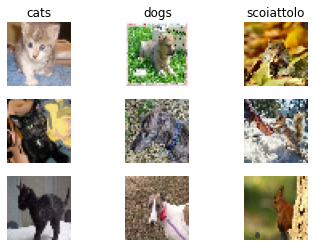

In [16]:
import matplotlib.pyplot as plt
classes = ['cats' , 'dogs' , 'scoiattolo']
num_classes = len(classes)
samples_per_class = 3
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Định hình dữ liệu ảnh thành các hàng

In [19]:
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
X = np.concatenate ((X_train, X_test), axis = 0)
y = np.concatenate ((y_train, y_test), axis = 0)

# Giảm chiều dữ liệu và vẽ biểu đồ phân lớp 2D

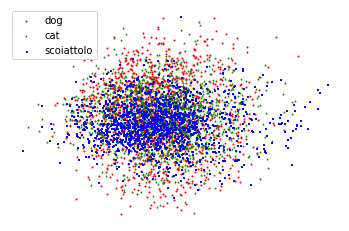

In [20]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA

# Normalize data
X_norm = (X - X.min())/(X.max() - X.min())
pca = sklearnPCA(n_components=3) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.axis("off")
plt.scatter(transformed[y==0][0], transformed[y==0][1], s=1, label='dog',
c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], s=1, label='cat',
c='green', marker="^")
plt.scatter(transformed[y==2][0], transformed[y==2][1], s=1, label='scoiattolo',
c='blue', marker="s")
plt.legend()
plt.show()

# Phân loại hình ảnh

## 1. Mô hình Multinomial Logistic Regression (Softmax)
### a, Phân loại hình ảnh

In [21]:
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Call to Logistic Regression Model - SAG: solving is based on Stochastic Average Gradient
lorg=LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000)
# and train model by Training Dataset
lorg.fit(X_train,y_train)
# Then Predict the Test data
y_pred=lorg.predict(X_test)
print(y_pred)

[0 1 0 ... 1 1 2]


### b, Độ chính xác

Accuracy:  0.42533333333333334


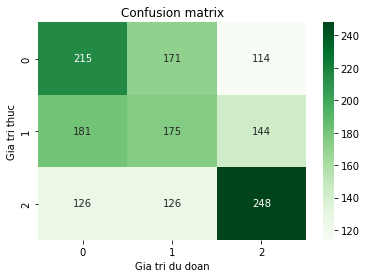

              precision    recall  f1-score   support

           0       0.41      0.43      0.42       500
           1       0.37      0.35      0.36       500
           2       0.49      0.50      0.49       500

    accuracy                           0.43      1500
   macro avg       0.42      0.43      0.42      1500
weighted avg       0.42      0.43      0.42      1500



In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
import seaborn as sns

# for accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test,y_pred))

# for confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt = 'g',cmap = 'Greens')
ax.set_xlabel('Gia tri du doan')
ax.set_ylabel('Gia tri thuc')
ax.set_title('Confusion matrix')  
plt.show()

#for precision, recall
print(classification_report(y_test,y_pred))

## 2. Mô hình Multi-Classes Support Vector Machine
## A, Sử dụng Kernel Poly
### a, Phân loại hình ảnh

In [ ]:
from sklearn import svm
M_svm = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
y_pred = M_svm.predict(X_test)
print(y_pred)

[0 0 0 ... 2 0 0]


### b, Độ chính xác

Accuracy:  0.5313333333333333


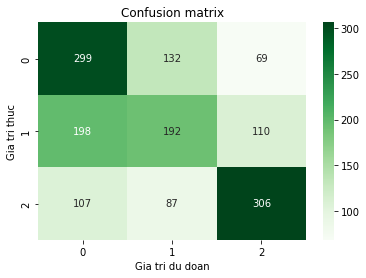

              precision    recall  f1-score   support

           0       0.50      0.60      0.54       500
           1       0.47      0.38      0.42       500
           2       0.63      0.61      0.62       500

    accuracy                           0.53      1500
   macro avg       0.53      0.53      0.53      1500
weighted avg       0.53      0.53      0.53      1500



In [ ]:
# for accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test,y_pred))

# for confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt = 'g',cmap = 'Greens')
ax.set_xlabel('Gia tri du doan')
ax.set_ylabel('Gia tri thuc')
ax.set_title('Confusion matrix')  
plt.show()

#for precision, recall
print(classification_report(y_test,y_pred))

## B,Sử dụng kernel BRF
### a, Phân loại hình ảnh

In [ ]:
from sklearn import svm
M_svm = svm.SVC(kernel='rbf', degree=3, C=1).fit(X_train, y_train)
y_pred = M_svm.predict(X_test)

### b, Độ chính xác

Accuracy:  0.568


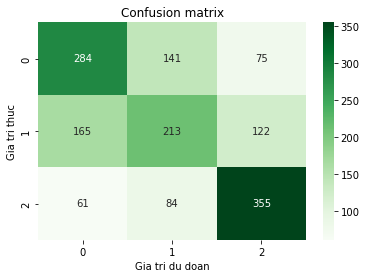

              precision    recall  f1-score   support

           0       0.56      0.57      0.56       500
           1       0.49      0.43      0.45       500
           2       0.64      0.71      0.67       500

    accuracy                           0.57      1500
   macro avg       0.56      0.57      0.56      1500
weighted avg       0.56      0.57      0.56      1500



In [ ]:
# for accuracy
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
import seaborn as sns
print("Accuracy: ", accuracy_score(y_test,y_pred))

# for confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt = 'g',cmap = 'Greens')
ax.set_xlabel('Gia tri du doan')
ax.set_ylabel('Gia tri thuc')
ax.set_title('Confusion matrix')  
plt.show()

#for precision, recall
print(classification_report(y_test,y_pred))